# Beverlyn Tucker
    IST652_Scripting Project Ecommerce Womens Clothing
    Professor: Dr. Debbie Landowski
    December 05,2020

# Introduction

As the world shrinks, due to rapid growth in technology, every conceivable industry's landscape has changed over a relatively short amount of time to keep pace with technological advancement. On the consumers' products and services side, people can purchase more various goods than ever before on platforms like Amazon to Google's services. 

With so much access and the ability to tap into a vast consumer base, businesses can see what drives consumer purchasing decisions to leverage customers' experiences before making a purchasing decision or investing in a marketing strategy. Without spending an enormous budget on marketing, online reviews will provide direct feedback on how the business can improve. Moreover, with the online economy, companies can incentivize feedback with better shipping rates or a discount. The establishment was always looking at the demographics. 

The companies may ask the data scientists to help have an insight with their products and help with their business to keep up with competitors. Rating is fundamental in the online platform. A client may ask to Investigate the ratings. We will concentrate on the ratings and compare ratings one and two with ratings three through five. Base on this group, is the demographic change? When applying polarity analysis to the text reviews, Is the results more positive or negative? What products do you recommend to the customer to focus on or to target products? What model is appropriate for this classification? 

One essential benefit a company may exploit from online reviews is that the analytical insights may empower businesses to improve without spending a huge amount of money on traditional marketing research. This also creates opportunities for direct interactions between the business and its customers. For example, companies can incentivize customers to provide direct feedback by offering perks and discounts. Of course, the drawback is that negative sentiment may quickly spread from one unhappy customer to a larger crowd. However, positive feedback from former customers may very likely resonate with new customers, which resonates and realizes a purchase.   

 Not surprisingly, some of the most detailed feedback comes from personal experiences, and they are usually unique to individuals. Prospective customers may find this very helpful as there are always minute aspects learned from someone else's perspective. These unique aspects echo among customers, and the prospective customers may leverage reviews to make purchasing decisions and generate more feedback extolling their joy or grief. This mitigates one downside of the online clothing e-commerce -- one cannot try on the clothing before purchasing.
With so much information in these online reviews, how can companies (and even some customers) churn through a sea of reviews to understand how people feel relatively quickly? Thankfully, machine learning algorithms were implemented to determine whether reviews en masse are related to positive or negative sentiment. Because algorithms are so fast and can run in perpetuity, companies and customers alike can look at the produced aggregated information to divine meaning. The only questions remaining are "which algorithm do you choose?", "How difficult is it to produce?" and "how accurate is it?"


# ANALYSIS


This project aims to ingest data from Kaggle.com regarding women's clothing reviews, clean it, use unsupervised and supervised methodologies to understand the customers' opinions towards various clothing pieces that have been purchased. The variables to be predicted Rating, it is possible to look deeper into the reviews and see which terms are strongly associated with recommendations and high ratings. From there, Support Vector Machines and Naïve Bayes Algorithms were leveraged to predict which reviews would get various rating levels, whether costumers will recommend, and whether they would receive positive feedback from other customers. Ultimately, the goal is to see if this information can be utilized by businesses to formulate actionable insights for improvements.


In [1]:
##import string
from collections import Counter
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import seaborn as sns
nltk.download('vader_lexicon')
from sklearn.feature_extraction.text import CountVectorizer
sid = SentimentIntensityAnalyzer()
from textblob import TextBlob
from wordcloud import WordCloud
import string
from nltk.stem.snowball import EnglishStemmer
import csv 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bevst\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# DATA PREPARATION:
Data from Kaggle. From homework one, data shows in ratings 1 and 2 approximately 1,500.  Homework 2 is going to investigate and understand the data further.  This time we're separating ratings 1 and 2 from the rest of the ratings and then compare the demographic for more in-depth analysis. 

Data parse to pandas data frame for better representation. This dataset with the following columns. 


# General View of the data
From homework one, data shows in ratings 1 and 2 approximately 1,500.  Homework 2 is going to investigate and understand the data more.  This time we're separating ratings 1 and 2 from the rest of the ratings and then compare the demographic for more in-depth analysis. 

In [2]:
Alldata = pd.read_csv('Womens_Clothing_E-Commerce_ReviewsR.csv')
Rating_1_2 = pd.read_csv('Womens_Clothing_E-Commerce_ReviewsR2.csv')
Rating_3_4_5 = pd.read_csv('Womens_Clothing_E-Commerce_ReviewsR3.csv')

In [3]:
Alldata = pd.read_csv('Womens_Clothing_E-Commerce_ReviewsR.csv')

In [4]:
Alldata=Alldata.loc[:,['Age','Rating', 'Review_Text','Recommended_IND','Division_Name', 'Department_Name','Class_Name']]
Alldata.head()

,Age,Rating,Review_Text,Recommended_IND,Division_Name,Department_Name,Class_Name
0,18,4,I found this dress on sale in store and i usua...,1,General,Dresses,Dresses
1,18,4,This shirt is incredibly comfortable. the mate...,1,General,Tops,Knits
2,18,5,I bought this dress for my engagement photo sh...,1,General,Dresses,Dresses
3,18,5,This skirt is absolutely beautiful and is a go...,1,General,Bottoms,Skirts
4,19,1,This dress is very thick cotton material. like...,0,Initmates,Intimate,Lounge


# Data Cleaning

In [ ]:
Rating_1_2(inplace=True)## remove all na's
Rating_3_4_5(inplace=True)## remove all na's

In [245]:

Rating_1_2=Rating_1_2.loc[:,['Age','Rating', 'Review_Text','Recommended_IND','Division_Name', 'Department_Name','Class_Name']]
Rating_1_2.head()

,Age,Rating,Review_Text,Recommended_IND,Division_Name,Department_Name,Class_Name
0,67,1,The skirt that i received had very little blue...,0,General Petite,Bottoms,Skirts
1,42,1,"These run very small!! they are also short, al...",0,General,Bottoms,Jeans
2,37,1,I waited three months for these pants. when th...,0,General,Bottoms,Pants
3,30,1,I was excited to see these jeans since they ca...,0,General,Bottoms,Jeans
4,47,1,"If i could sew, i'd take the fabric from this ...",0,General,Bottoms,Skirts


In [234]:
Rating_3_4_5=Rating_3_4_5.loc[:,['Age','Rating','Review_Text', 'Recommended_IND','Division_Name', 'Department_Name','Class_Name']]
Rating_3_4_5.head()

,Age,Rating,Review_Text,Recommended_IND,Division_Name,Department_Name,Class_Name
0,34,3,Material and color is nice. the leg opening i...,1,General,Bottoms,Pants
1,49,3,This skirt looks exactly as pictured and fits ...,0,General Petite,Bottoms,Skirts
2,48,3,I love the rich deep color and the style but o...,0,General Petite,Bottoms,Skirts
3,48,3,"Love pilcro, love the stripes and the length -...",1,General,Bottoms,Pants
4,49,3,"I tried these on in the store, and they are su...",1,General,Bottoms,Pants


In [235]:
Rating_1_2.describe()

,Age,Rating,Recommended_IND
count,1494.000000,1494.000000,1494.000000
mean,42.607764,1.543507,0.036145
std,11.853373,0.498270,0.186712
min,19.000000,1.000000,0.000000
25%,34.000000,1.000000,0.000000
50%,41.000000,2.000000,0.000000
75%,50.000000,2.000000,0.000000
max,91.000000,2.000000,1.000000


In [78]:
Rating_3_4_5.describe()

,Age,Rating,Recommended_IND
count,1006.000000,1006.000000,1006.000000
mean,43.175944,3.713718,0.743539
std,12.244762,0.720386,0.436897
min,19.000000,3.000000,0.000000
25%,34.000000,3.000000,0.000000
50%,41.000000,4.000000,1.000000
75%,52.000000,4.000000,1.000000
max,91.000000,5.000000,1.000000


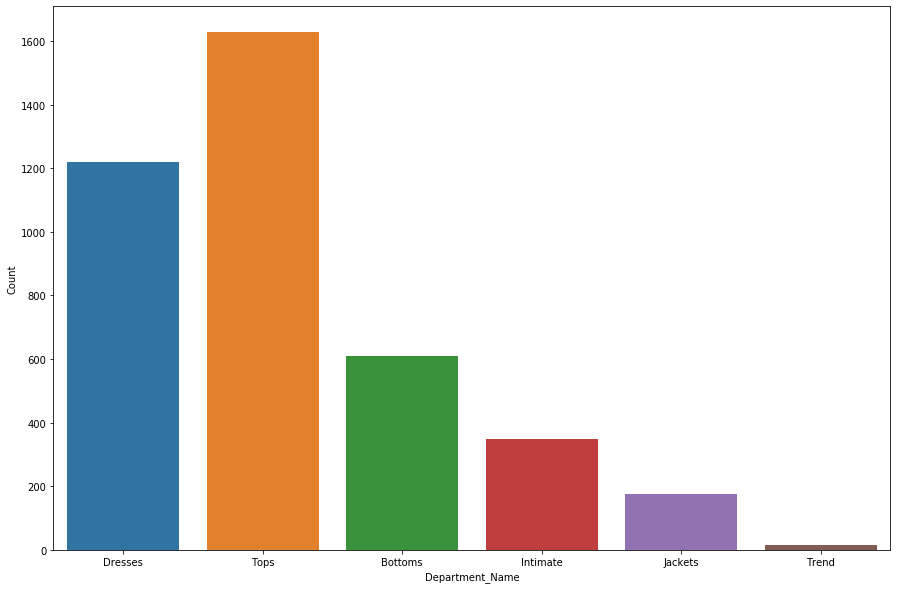

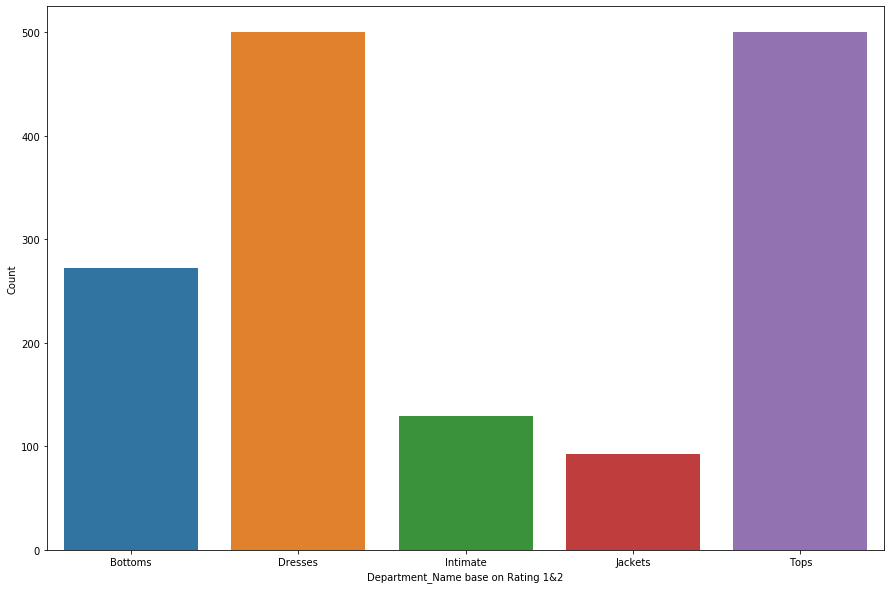

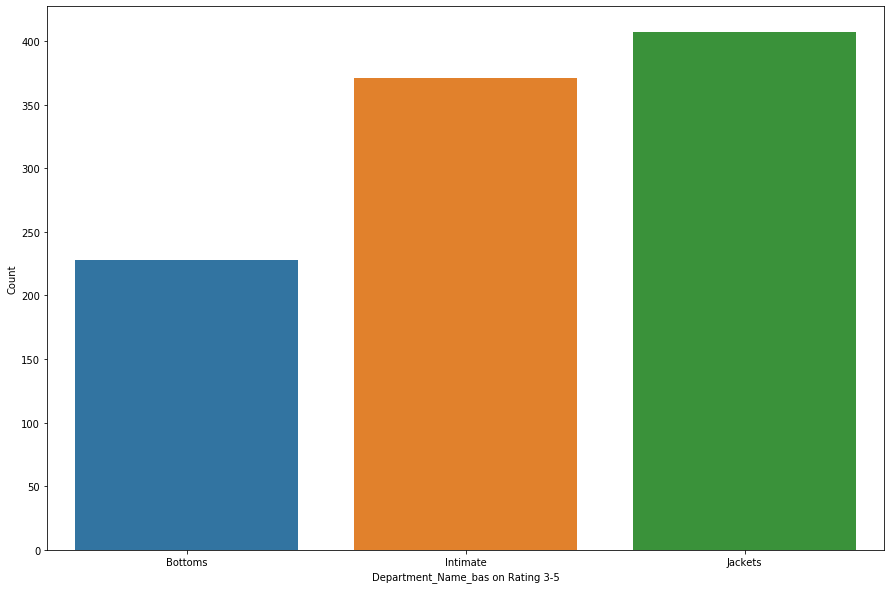

In [236]:
Alldata['Department_Name'].value_counts()

sns.countplot('Department_Name', data=Alldata)
_ = plt.xlabel('Department_Name')
_ = plt.ylabel('Count')
plt.show()


Rating_1_2['Department_Name'].value_counts()

sns.countplot('Department_Name', data=Rating_1_2)
_ = plt.xlabel('Department_Name base on Rating 1&2')
_ = plt.ylabel('Count')
plt.show()

Rating_3_4_5['Department_Name'].value_counts()

sns.countplot('Department_Name', data=Rating_3_4_5)
_ = plt.xlabel('Department_Name_bas on Rating 3-5')
_ = plt.ylabel('Count')
plt.show()

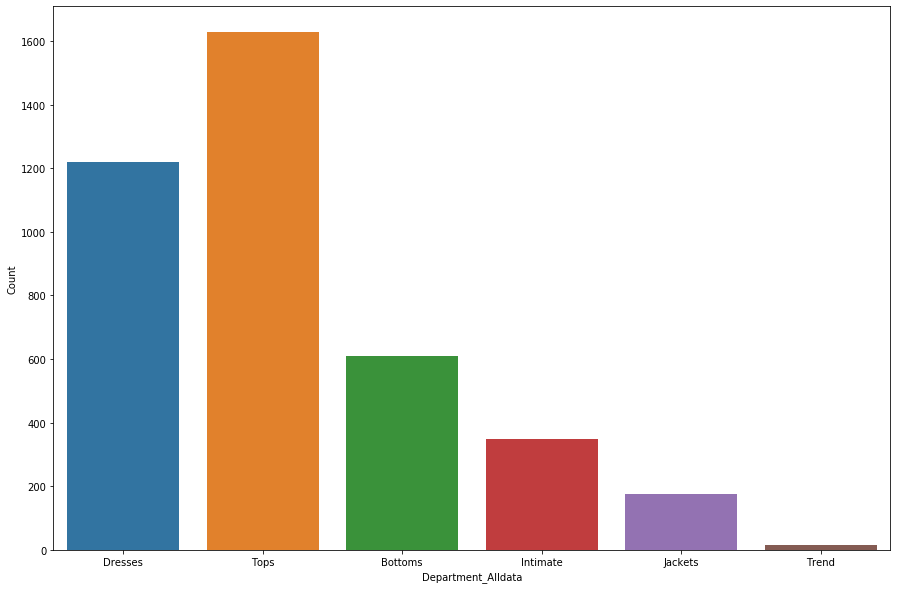

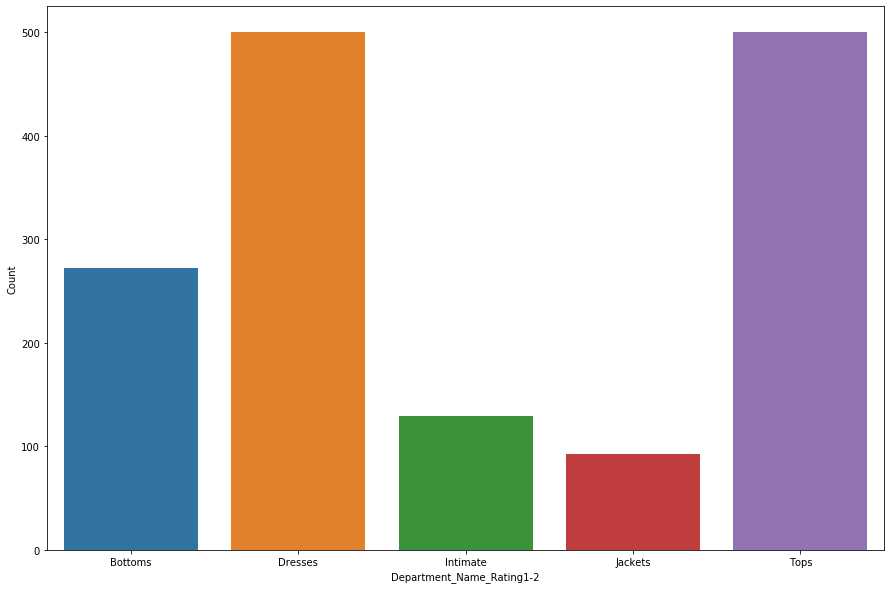

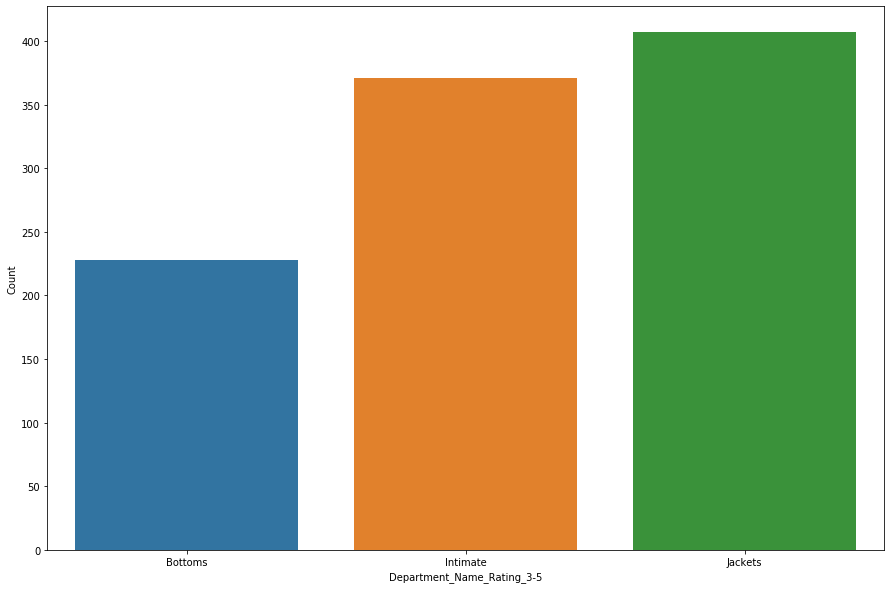

In [237]:
##by Department Name 

Alldata['Rating'].value_counts()

Alldata['Department_Name'].value_counts()

sns.countplot('Department_Name', data=Alldata)
_ = plt.xlabel('Department_Alldata')
_ = plt.ylabel('Count')
plt.show()

# Count by Rating 1 and 2
Rating_1_2['Rating'].value_counts()

Rating_1_2['Department_Name'].value_counts()

sns.countplot('Department_Name', data=Rating_1_2)
_ = plt.xlabel('Department_Name_Rating1-2')
_ = plt.ylabel('Count')
plt.show()

##Rating_3_4_5
Rating_3_4_5['Rating'].value_counts()

Rating_3_4_5['Department_Name'].value_counts()

sns.countplot('Department_Name', data=Rating_3_4_5)
_ = plt.xlabel('Department_Name_Rating_3-5')
_ = plt.ylabel('Count')
plt.show()

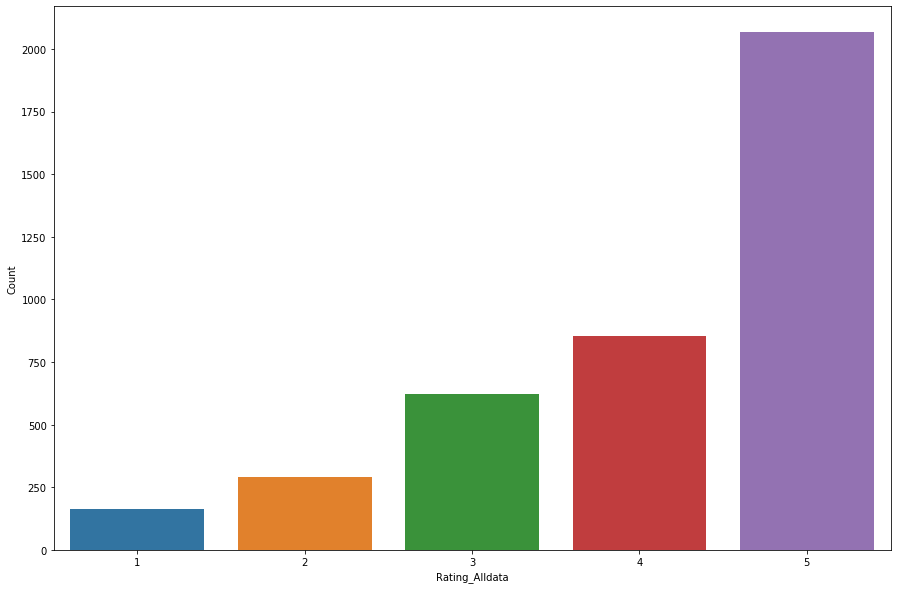

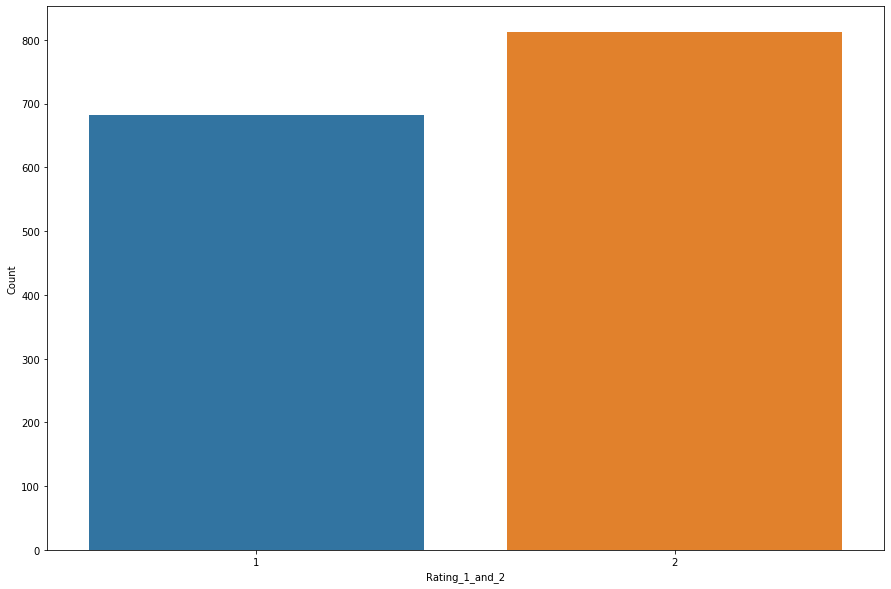

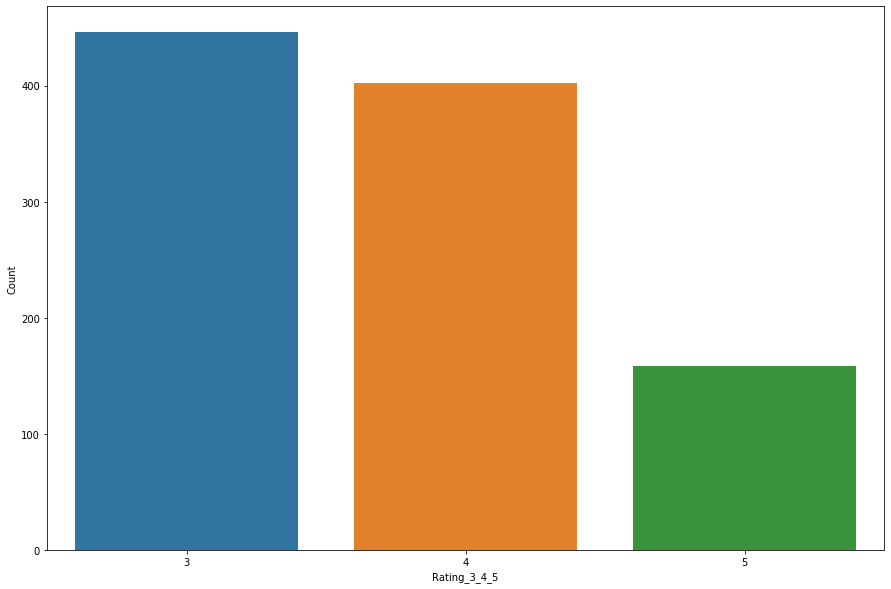

In [238]:
##by Department Name 

sns.countplot('Rating', data=Alldata)
_ = plt.xlabel('Rating_Alldata')
_ = plt.ylabel('Count')
plt.show()
# Count by Rating 1 and 2

sns.countplot('Rating', data=Rating_1_2)
_ = plt.xlabel('Rating_1_and_2')
_ = plt.ylabel('Count')
plt.show()

sns.countplot('Rating', data=Rating_3_4_5)
_ = plt.xlabel('Rating_3_4_5')
_ = plt.ylabel('Count')
plt.show()

Text(0.5, 1, 'Average Rating_3-5 By Department Name')

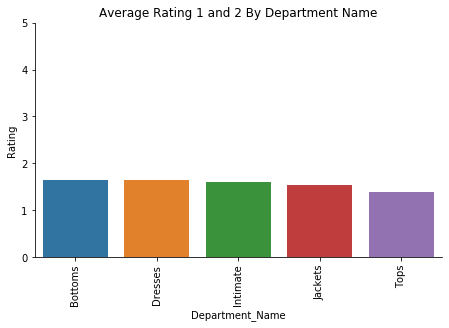

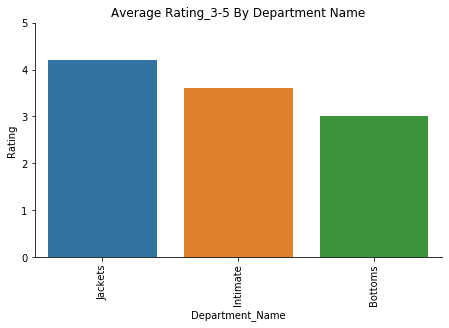

In [10]:
plot_order = Rating_1_2.groupby('Department_Name')['Rating'].mean().sort_values(ascending=False).index.tolist()
g = sns.catplot(x='Department_Name', y='Rating', kind='bar', order=plot_order, data=Rating_1_2, ci=None, height=4, aspect=1.618)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylim(0,5)
plt.title('Average Rating 1 and 2 By Department Name')

plot_order = Rating_3_4_5.groupby('Department_Name')['Rating'].mean().sort_values(ascending=False).index.tolist()
g = sns.catplot(x='Department_Name', y='Rating', kind='bar', order=plot_order, data=Rating_3_4_5, ci=None, height=4, aspect=1.618)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylim(0,5)
plt.title('Average Rating_3-5 By Department Name')

In [11]:
Rating_1_2['Class_Name'].value_counts()

Dresses       500
Knits         226
Blouses       156
Pants         101
Jeans          76
Skirts         72
Sweaters       65
Jackets        62
Fine gauge     53
Lounge         40
Swim           35
Outerwear      31
Shorts         23
Sleep          21
Legwear        15
Intimates      10
Layering        8
Name: Class_Name, dtype: int64

In [12]:
Rating_3_4_5['Class_Name'].value_counts()

Jackets      286
Lounge       173
Outerwear    121
Pants         81
Swim          73
Jeans         69
Skirts        57
Sleep         41
Legwear       31
Intimates     31
Layering      21
Shorts        21
Chemises       1
Name: Class_Name, dtype: int64

Text(0.5, 1, 'Average Ratings By Class Name_RRating_3_4_5')

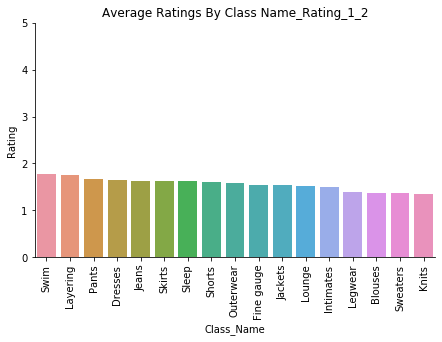

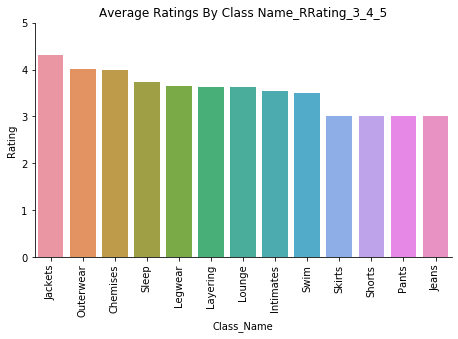

In [13]:
plot_order = Rating_1_2.groupby('Class_Name')['Rating'].mean().sort_values(ascending=False).index.tolist()
g = sns.catplot(x='Class_Name', y='Rating', kind='bar', order=plot_order, data=Rating_1_2, ci=None, height=4, aspect=1.618)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylim(0,5)
plt.title('Average Ratings By Class Name_Rating_1_2')

plot_order = Rating_3_4_5.groupby('Class_Name')['Rating'].mean().sort_values(ascending=False).index.tolist()
g = sns.catplot(x='Class_Name', y='Rating', kind='bar', order=plot_order, data=Rating_3_4_5, ci=None, height=4, aspect=1.618)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylim(0,5)
plt.title('Average Ratings By Class Name_RRating_3_4_5')

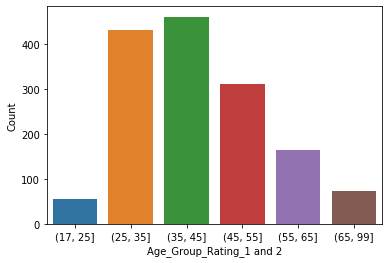

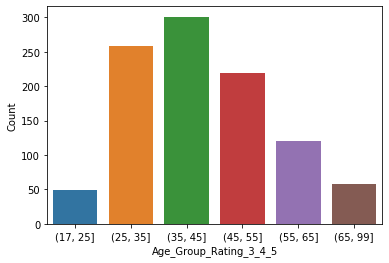

In [14]:
Rating_1_2['Age_Group'] = pd.cut(x=Rating_1_2['Age'], bins=[17,25,35,45,55,65,99])
Rating_1_2['Age_Group'].value_counts()


sns.countplot('Age_Group', data=Rating_1_2)
_ = plt.xlabel('Age_Group_Rating_1 and 2')
_ = plt.ylabel('Count')
plt.show()


Rating_3_4_5['Age_Group'] = pd.cut(x=Rating_3_4_5['Age'], bins=[17,25,35,45,55,65,99])
Rating_3_4_5['Age_Group'].value_counts()


sns.countplot('Age_Group', data=Rating_3_4_5)
_ = plt.xlabel('Age_Group_Rating_3_4_5')
_ = plt.ylabel('Count')
plt.show()

Text(0.5, 1, 'Average Rating_3_4_5 By Age Group')

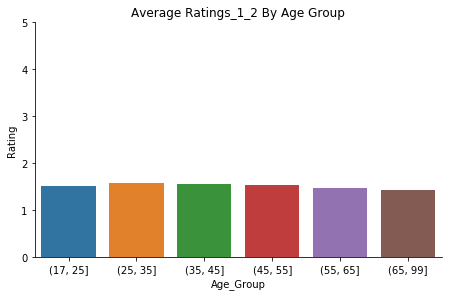

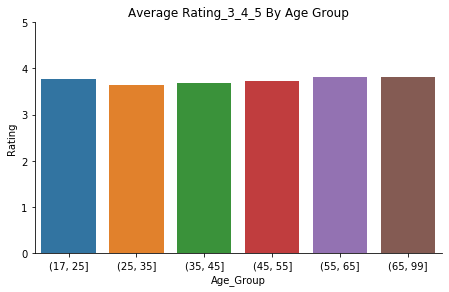

In [15]:
g = sns.catplot(x='Age_Group', y='Rating', kind='bar', data=Rating_1_2, ci=None, height=4, aspect=1.618)
plt.ylim(0,5)
plt.title('Average Ratings_1_2 By Age Group')

g = sns.catplot(x='Age_Group', y='Rating', kind='bar', data=Rating_3_4_5, ci=None, height=4, aspect=1.618)
plt.ylim(0,5)
plt.title('Average Rating_3_4_5 By Age Group')

In [10]:
Rating_1_2['Recommended_IND'].value_counts()

0    1440
1      54
Name: Recommended_IND, dtype: int64

In [11]:
Rating_3_4_5['Recommended_IND'].value_counts()

1    748
0    258
Name: Recommended_IND, dtype: int64

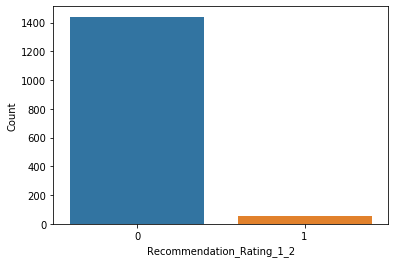

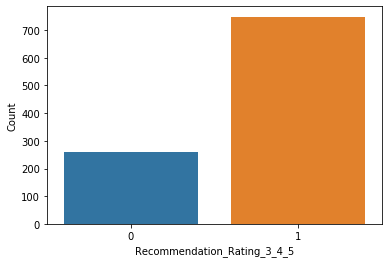

In [12]:
sns.countplot('Recommended_IND', data=Rating_1_2)
_ = plt.xlabel('Recommendation_Rating_1_2')
_ = plt.ylabel('Count')
plt.show()

sns.countplot('Recommended_IND', data=Rating_3_4_5)
_ = plt.xlabel('Recommendation_Rating_3_4_5')
_ = plt.ylabel('Count')
plt.show()

# Looking at the data closely

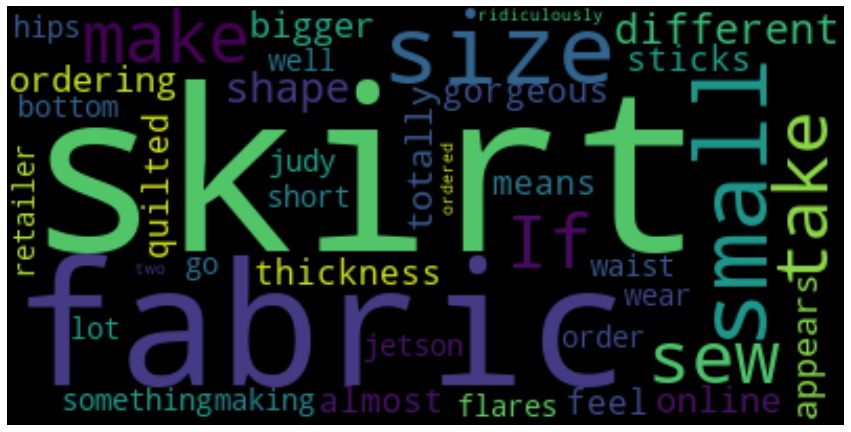

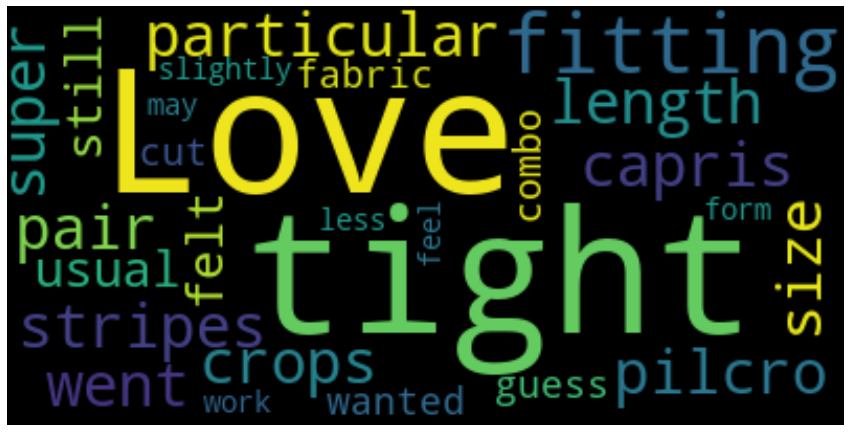

In [239]:
# Start with one review:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = Rating_1_2.Review_Text[4]
stopwords = set(STOPWORDS)
# Create and generate a word cloud image:
stopwords.update(["wPk7QWpK8Z", "co", "https"])
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Start with one review:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = Rating_3_4_5.Review_Text[3]
stopwords = set(STOPWORDS)
# Create and generate a word cloud image:
stopwords.update(["wPk7QWpK8Z", "co", "https","5'1"])
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


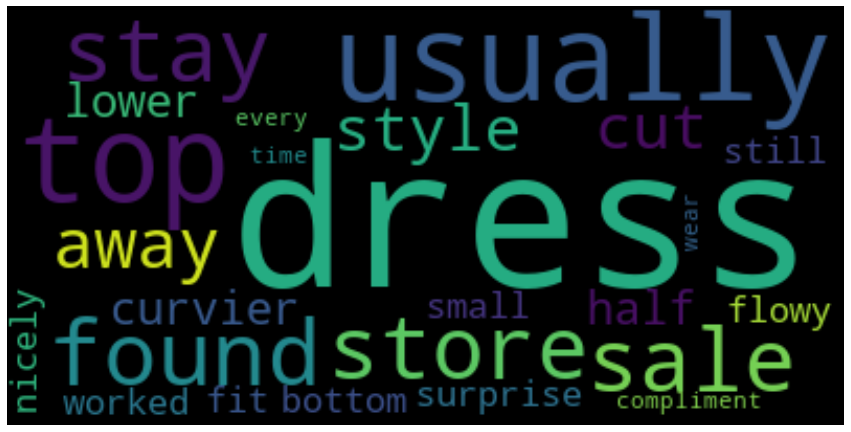

In [8]:
# Start with one review:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = Alldata.Review_Text[0]
stopwords = set(STOPWORDS)
# Create and generate a word cloud image:
stopwords.update(["wPk7QWpK8Z", "co", "https"])
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [46]:
#Function to get Subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Function to get Polarity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

#create a new colums
Rating_1_2['Subjectivity'] = Rating_1_2['Review_Text'].apply(getSubjectivity)
Rating_1_2['Polarity'] = Rating_1_2['Review_Text'].apply(getpolarity)
Rating_1_2.head()

def getAnalysis(score):
    if score <0:
        return  'Negative'
        #return  '0'#Negative'
    #elif score ==0:
    #    return 'Neutral'
    else:
        return 'Positive'
        #return '1'#''Positive'
    
    
Rating_1_2['Analysis_Pol'] = Rating_1_2['Polarity'].apply(getAnalysis)

#Rating_1_2['Analysis_Sub'] = Rating_1_2['Subjectivity'].apply(getAnalysis)

#Show new data frame
Rating_1_2.head()
Res_Rting1_2=Rating_1_2.head()

In [47]:
#Function to get Subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Function to get Polarity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

#create a new colums
Rating_3_4_5['Subjectivity'] = Rating_3_4_5['Review_Text'].apply(getSubjectivity)
Rating_3_4_5['Polarity'] = Rating_3_4_5['Review_Text'].apply(getpolarity)
Rating_3_4_5.head()

def getAnalysis(score):
    if score <0:
        return  'Negative'
    #elif score ==0:
     #   return 'Neutral'
    else:
        return 'Positive'
    
    
Rating_3_4_5['Analysis_Pol'] = Rating_3_4_5['Polarity'].apply(getAnalysis)

#Rating_3_4_5['Analysis_Sub'] = Rating_1_2['Subjectivity'].apply(getAnalysis)

#Show new data frame
Rating_3_4_5.head()
#Res_Rtaing3_5 = Rating_3_4_5.head()

,ID,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Subjectivity,Polarity,Analysis_Pol
0,12813,1065,34,"You need to be at least average height, or taller",Material and color is nice. the leg opening i...,3,1,2,General,Bottoms,Pants,0.454762,0.134921,Positive
1,14344,1020,49,Poor quality,This skirt looks exactly as pictured and fits ...,3,0,0,General Petite,Bottoms,Skirts,0.428571,0.035714,Positive
2,14349,1020,48,Runs small too bad....,I love the rich deep color and the style but o...,3,0,9,General Petite,Bottoms,Skirts,0.542857,0.166270,Positive
3,14664,1066,48,Recommend but not for me,"Love pilcro, love the stripes and the length -...",3,1,0,General,Bottoms,Pants,0.408810,0.185119,Positive
4,15030,1066,49,Cute but small,"I tried these on in the store, and they are su...",3,1,1,General,Bottoms,Pants,0.600397,0.173016,Positive


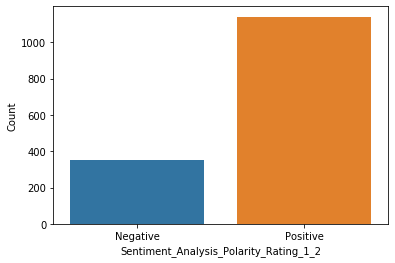

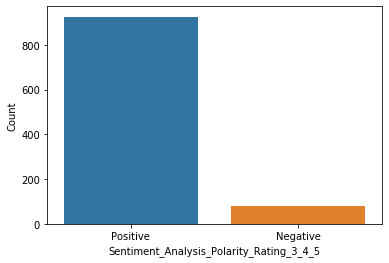

In [23]:

sns.countplot('Analysis_Pol', data=Rating_1_2)
_ = plt.xlabel('Sentiment_Analysis_Polarity_Rating_1_2')
_ = plt.ylabel('Count')
plt.show()

sns.countplot('Analysis_Pol', data=Rating_3_4_5)
_ = plt.xlabel('Sentiment_Analysis_Polarity_Rating_3_4_5')
_ = plt.ylabel('Count')
plt.show()

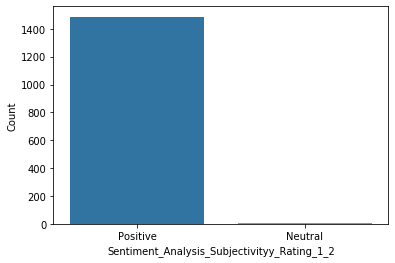

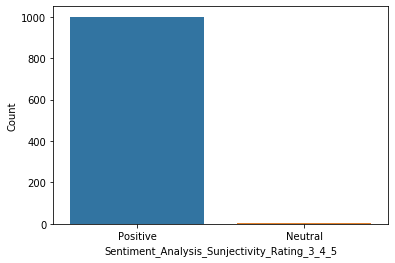

In [24]:
sns.countplot('Analysis_Sub', data=Rating_1_2)
_ = plt.xlabel('Sentiment_Analysis_Subjectivityy_Rating_1_2')
_ = plt.ylabel('Count')
plt.show()

sns.countplot('Analysis_Sub', data=Rating_3_4_5)
_ = plt.xlabel('Sentiment_Analysis_Sunjectivity_Rating_3_4_5')
_ = plt.ylabel('Count')
plt.show()

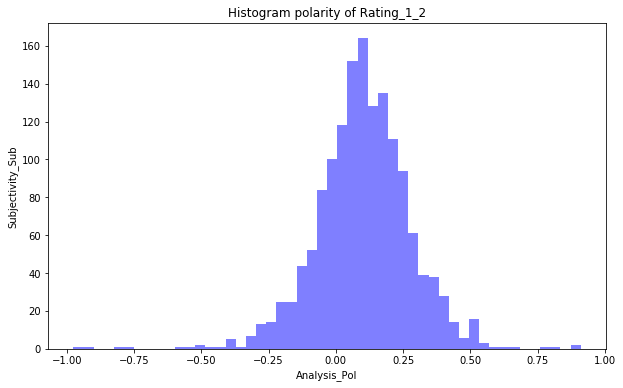

In [16]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(Rating_1_2.Polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Analysis_Pol')
plt.ylabel('Subjectivity_Sub')
plt.title('Histogram polarity of Rating_1_2')
plt.show();

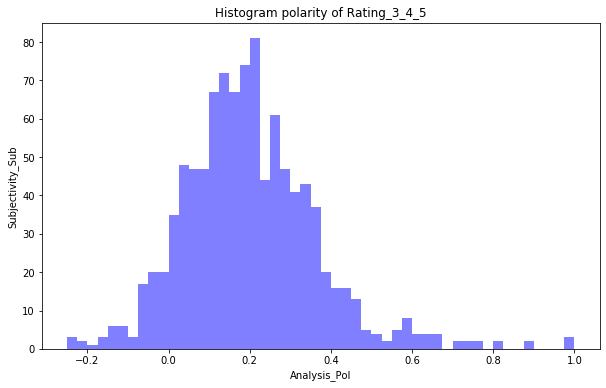

In [17]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(Rating_3_4_5.Polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Analysis_Pol')
plt.ylabel('Subjectivity_Sub')
plt.title('Histogram polarity of Rating_3_4_5')
plt.show();

In [270]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import EnglishStemmer
import seaborn as sns
import matplotlib.pyplot as plt
stemmer = EnglishStemmer()

In [367]:
Rating_1_2 = pd.read_csv('Womens_Clothing_E-Commerce_ReviewsR2.csv')

In [368]:
# Isolate the tweets in a corpus list
corpus = Rating_1_2['Review_Text']

cv = CountVectorizer(token_pattern=r'\b[^\d\W]+\b')
Xcv = cv.fit_transform(corpus)

# Create a TF-IDF vectorizer to compare results. 
tfidf = TfidfVectorizer(token_pattern=r'\b[^\d\W]+\b')
Xti = tfidf.fit_transform(corpus)

# Print length of the dictionaries to serve as a baseline. 
print("Count Vectorizer Rating_1_2 words in dictionary: %s" % len(cv.get_feature_names()))
print('TF-IDF Vectorizer Rating_1_2 words in dictionary: %s' % len(tfidf.get_feature_names()))

Count Vectorizer Rating_1_2 words in dictionary: 4523
TF-IDF Vectorizer Rating_1_2 words in dictionary: 4523


In [369]:
stemmer = EnglishStemmer()

# Builds Count and TF-IDF analyzers that consider patterns and stop words. 
cv3 = CountVectorizer(token_pattern=r'\b[^\d\W]+\b', stop_words='english').build_analyzer()
tfidf3 = TfidfVectorizer(token_pattern=r'\b[^\d\W]+\b', stop_words='english').build_analyzer()

print(tfidf3)

# Loops over every word to find the stemmed word for faster computation
def stemmed_cv_words(doc):
    return (stemmer.stem(w) for w in cv3(doc))

def stemmed_tfidf_words(doc):
    return (stemmer.stem(w) for w in tfidf3(doc))

# Final vectorizer that outputs dictionary lengths
cv_stem = CountVectorizer(analyzer=stemmed_cv_words)
cv3 = cv_stem.fit_transform(corpus)

tfidf_stem = TfidfVectorizer(analyzer=stemmed_tfidf_words)
tfidf3 = tfidf_stem.fit_transform(corpus)

##print(tfidf3)

print('Stemmed Count Rating_1_2_Vectorizer: %s' % len(cv_stem.get_feature_names()))
print('Stemmed TF-IDF Rating_1_2 Vectorizer: %s' % len(tfidf_stem.get_feature_names()))

functools.partial(<function _analyze at 0x00000262C9B4D4C8>, ngrams=<bound method _VectorizerMixin._word_ngrams of TfidfVectorizer(stop_words='english', token_pattern='\\b[^\\d\\W]+\\b')>, tokenizer=<built-in method findall of re.Pattern object at 0x00000262D4B4FF30>, preprocessor=functools.partial(<function _preprocess at 0x00000262C9ADA3A8>, accent_function=None, lower=True), decoder=<bound method _VectorizerMixin.decode of TfidfVectorizer(stop_words='english', token_pattern='\\b[^\\d\\W]+\\b')>, stop_words=frozenset({'hasnt', 'might', 'three', 'upon', 'latterly', 'formerly', 'made', 'moreover', 'namely', 'until', 'whenever', 'take', 'hereby', 'though', 'me', 'throughout', 'cry', 'from', 'somehow', 'became', 'elsewhere', 'along', 'thereafter', 'twenty', 'wherever', 'back', 'beforehand', 'four', 'in', 'only', 'ours', 'cant', 'some', 'this', 'at', 'she', 'hereafter', 'whatever', 'fifteen', 'least', 'across', 'yet', 'where', 'anything', 'himself', 'due', 'five', 'when', 'what', 'whereaf

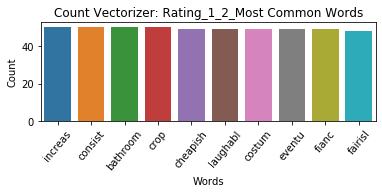

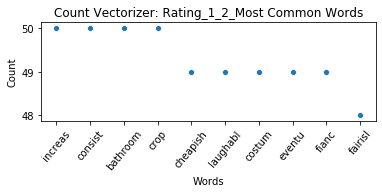

In [370]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gets the labels and sum of words for Count Vectorizer. Then, we convert to Pandas series 
# and Data top10 most common words. 
# Finally, we plot the most common words to see how the vectorizer has stemmed the words. 
cv_labels, cv_values = cv_stem.get_feature_names(), cv3.sum(axis=1)
cv_labels = pd.Series(cv_labels)
cv_values = pd.DataFrame(cv_values)
cv_count = pd.concat([cv_labels, cv_values], axis=1, ignore_index=True)
cv_count.columns = ['labels', 'values']
cv_count = cv_count.sort_values(by=['values'], ascending=False)

cv_count_top10 = cv_count[:10]

# Plot the vectorizers for visual comparison. 
plt.subplot(2, 1, 1)
sns.barplot(x='labels', y='values', data=cv_count_top10)
_ = plt.xlabel('Words')
_ = plt.xticks(rotation=50)
_ = plt.ylabel('Count')
_ = plt.title('Count Vectorizer: Rating_1_2_Most Common Words')
plt.show()


# Plot the vectorizers for visual comparison. 
plt.subplot(2, 1, 2)
sns.scatterplot(x='labels', y='values', data=cv_count_top10)
_ = plt.xlabel('Words')
_ = plt.xticks(rotation=50)
_ = plt.ylabel('Count')
_ = plt.title('Count Vectorizer: Rating_1_2_Most Common Words')
plt.show()

In [39]:
print(cv_count_top10)

        labels  values
1297   increas    50.0
527    consist    50.0
173   bathroom    50.0
588       crop    50.0
414   cheapish    49.0
1425  laughabl    49.0
554     costum    49.0
872     eventu    49.0
968      fianc    49.0
927    fairisl    48.0


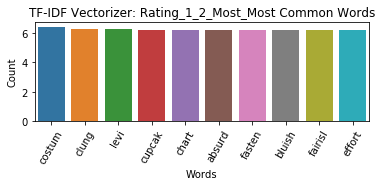

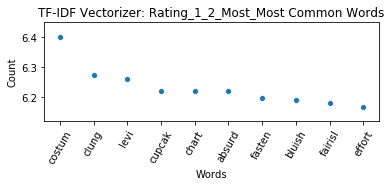

In [13]:
# Repeat the process for the TF-IDF Vectorizer. 
tfidf_labels, tfidf_values = tfidf_stem.get_feature_names(), tfidf3.sum(axis=1)
tfidf_labels = pd.Series(tfidf_labels)
tfidf_values = pd.DataFrame(tfidf_values)
tfidf_count = pd.concat([tfidf_labels, tfidf_values], axis=1, ignore_index=True)
tfidf_count.columns = ['labels', 'values']
tfidf_count = tfidf_count.sort_values(by=['values'], ascending=False)

# Select the top ten most common words to verify if the vectorizers are splitting the same way. 
tfidf_count_top10 = tfidf_count[:10]

plt.subplot(2, 1, 2)
sns.barplot(x='labels', y='values', data=tfidf_count_top10)
_ = plt.xlabel('Words')
_ = plt.xticks(rotation=60)
_ = plt.ylabel('Count')
_ = plt.title('TF-IDF Vectorizer: Rating_1_2_Most_Most Common Words')
plt.show()



plt.subplot(2, 1, 2)
sns.scatterplot(x='labels', y='values', data=tfidf_count_top10)
_ = plt.xlabel('Words')
_ = plt.xticks(rotation=60)
_ = plt.ylabel('Count')
_ = plt.title('TF-IDF Vectorizer: Rating_1_2_Most_Most Common Words')
plt.show()


In [41]:
print(tfidf_count_top10)

       labels    values
554    costum  6.401122
477     clung  6.271922
1455     levi  6.259399
599    cupcak  6.219357
410     chart  6.218390
8      absurd  6.217686
942    fasten  6.195660
241    bluish  6.187271
927   fairisl  6.179858
826    effort  6.166206


# Rating 3-5

In [24]:
# Isolate the tweets in a corpus list
corpus2 = Rating_3_4_5['Review_Text']

cv2 = CountVectorizer(token_pattern=r'\b[^\d\W]+\b')
Xcv2 = cv2.fit_transform(corpus2)

# Create a TF-IDF vectorizer to compare results. 
tfidf2 = TfidfVectorizer(token_pattern=r'\b[^\d\W]+\b')
Xti2 = tfidf2.fit_transform(corpus2)

# Print length of the dictionaries to serve as a baseline. 
print("Count Vectorizer Rating_3_4_5 words in dictionary: %s" % len(cv2.get_feature_names()))
print('TF-IDF Vectorizer Rating_3_4_5 words in dictionary: %s' % len(tfidf2.get_feature_names()))


Count Vectorizer Rating_3_4_5 words in dictionary: 3801
TF-IDF Vectorizer Rating_3_4_5 words in dictionary: 3801


In [27]:
stemmer1 = EnglishStemmer()

# Builds Count and TF-IDF analyzers that consider patterns and stop words. 
cv4 = CountVectorizer(token_pattern=r'\b[^\d\W]+\b', stop_words='english').build_analyzer()
tfidf4 = TfidfVectorizer(token_pattern=r'\b[^\d\W]+\b', stop_words='english').build_analyzer()

print(tfidf4)

# Loops over every word to find the stemmed word for faster computation
def stemmed_cv_words(doc):
    return (stemmer1.stem(w) for w in cv4(doc))

def stemmed_tfidf_words(doc):
    return (stemmer1.stem(w) for w in tfidf4(doc))

# Final vectorizer that outputs dictionary lengths
cv_stem2 = CountVectorizer(analyzer=stemmed_cv_words)
cv4 = cv_stem2.fit_transform(corpus2)

tfidf_stem2 = TfidfVectorizer(analyzer=stemmed_tfidf_words)
tfidf4 = tfidf_stem2.fit_transform(corpus2)

##print(tfidf3)

print('Stemmed Count Rating_3_4_5 Vectorizer: %s' % len(cv_stem2.get_feature_names()))
print('Stemmed TF-IDF Rating_3_4_5 Vectorizer: %s' % len(tfidf_stem2.get_feature_names()))

functools.partial(<function _analyze at 0x000001F7D3CB4CA8>, ngrams=<bound method _VectorizerMixin._word_ngrams of TfidfVectorizer(stop_words='english', token_pattern='\\b[^\\d\\W]+\\b')>, tokenizer=<built-in method findall of re.Pattern object at 0x000001F7D4EFACF0>, preprocessor=functools.partial(<function _preprocess at 0x000001F7D3C59B88>, accent_function=None, lower=True), decoder=<bound method _VectorizerMixin.decode of TfidfVectorizer(stop_words='english', token_pattern='\\b[^\\d\\W]+\\b')>, stop_words=frozenset({'more', 'almost', 'you', 'therein', 'should', 'ours', 'through', 'inc', 'wherever', 'could', 'of', 'whither', 'own', 'where', 'within', 'then', 'go', 'from', 'well', 'thereby', 'me', 'must', 'wherein', 'nothing', 'however', 'forty', 'somewhere', 'sometimes', 'whatever', 'am', 'been', 'amoungst', 'thence', 'is', 'ourselves', 'hundred', 'hereby', 'elsewhere', 'that', 'part', 'any', 'thus', 'name', 'five', 'your', 'among', 'put', 'anywhere', 'yourselves', 'he', 'once', 'ho

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gets the labels and sum of words for Count Vectorizer. Then, we convert to Pandas series 
# and Data top10 most common words. 
# Finally, we plot the most common words to see how the vectorizer has stemmed the words. 
cv_labels2, cv_values2 = cv_stem2.get_feature_names(), cv4.sum(axis=1)
cv_labels2 = pd.Series(cv_labels2)
cv_values2 = pd.DataFrame(cv_values2)
cv_count2 = pd.concat([cv_labels2, cv_values2], axis=1, ignore_index=True)
cv_count2.columns = ['labels2', 'values2']
cv_count2 = cv_count2.sort_values(by=['values2'], ascending=False)


cv_count_top10 = cv_count2[:10]
print(cv_count_top10)


     labels2  values2
755   experi     54.0
962  grandma     53.0
865  footbal     51.0
734  essenti     51.0
650   drapey     51.0
529  curious     51.0
728  equival     51.0
789    fatti     50.0
909   fuscia     50.0
307     bust     50.0


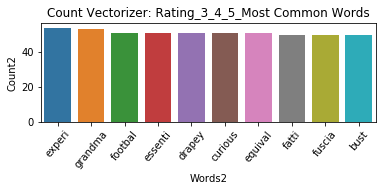

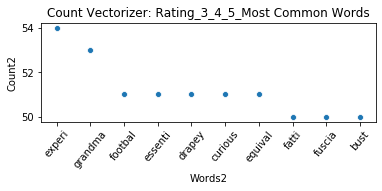

In [19]:
# Plot the vectorizers for visual comparison. 
plt.subplot(2, 1, 1)
sns.barplot(x='labels2', y='values2', data=cv_count_top10)
_ = plt.xlabel('Words2')
_ = plt.xticks(rotation=50)
_ = plt.ylabel('Count2')
_ = plt.title('Count Vectorizer: Rating_3_4_5_Most Common Words')
plt.show()


# Plot the vectorizers for visual comparison. 
plt.subplot(2, 1, 2)
sns.scatterplot(x='labels2', y='values2', data=cv_count_top10)
_ = plt.xlabel('Words2')
_ = plt.xticks(rotation=50)
_ = plt.ylabel('Count2')
_ = plt.title('Count Vectorizer: Rating_3_4_5_Most Common Words')
plt.show()


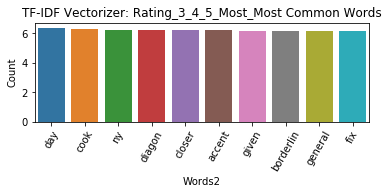

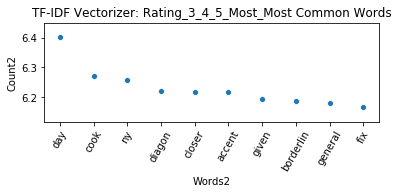

In [23]:
# Repeat the process for the TF-IDF Vectorizer. 
tfidf_labels2, tfidf_values2 = tfidf_stem2.get_feature_names(), tfidf4.sum(axis=1)
tfidf_labels2 = pd.Series(tfidf_labels2)
tfidf_values2 = pd.DataFrame(tfidf_values)
tfidf_count2 = pd.concat([tfidf_labels2, tfidf_values2], axis=1, ignore_index=True)
tfidf_count2.columns = ['labels2', 'values2']
tfidf_count2 = tfidf_count2.sort_values(by=['values2'], ascending=False)

# Select the top ten most common words to verify if the vectorizers are splitting the same way. 
tfidf_count_top10 = tfidf_count2[:10]

plt.subplot(2, 1, 2)
sns.barplot(x='labels2', y='values2', data=tfidf_count_top10)
_ = plt.xlabel('Words2')
_ = plt.xticks(rotation=60)
_ = plt.ylabel('Count')
_ = plt.title('TF-IDF Vectorizer: Rating_3_4_5_Most_Most Common Words')
plt.show()



plt.subplot(2, 1, 2)
sns.scatterplot(x='labels2', y='values2', data=tfidf_count_top10)
_ = plt.xlabel('Words2')
_ = plt.xticks(rotation=60)
_ = plt.ylabel('Count2')
_ = plt.title('TF-IDF Vectorizer: Rating_3_4_5_Most_Most Common Words')
plt.show()


In [207]:
Dress_Tops = Rating_1_2[(Rating_1_2['Department_Name'] == 'Dresses') | (Rating_1_2['Department_Name'] == 'Tops, ==knits')]
Dress_Tops

,Age,Rating,Review_Text,Recommended_IND,Division_Name,Department_Name,Class_Name,Subjectivity,Polarity,Analysis_Pol
272,38,1,"I don't normally review my purchases, but i wa...",0,General,Dresses,Dresses,0.541111,0.094306,Positive
273,23,1,"I don't typically write bad reviews, but this ...",0,General Petite,Dresses,Dresses,0.513889,-0.251190,Negative
274,42,1,I loved the photo of this dress. upon examinat...,0,General,Dresses,Dresses,0.566667,0.466667,Positive
275,43,1,There is no way this is worth the price. i was...,0,General,Dresses,Dresses,0.600000,0.010000,Positive
276,37,1,I'm so incredibly disappointed. the dress is b...,0,General,Dresses,Dresses,0.480000,-0.100000,Negative
...,...,...,...,...,...,...,...,...,...,...
767,34,2,I probably should have gone with petite. this ...,0,General Petite,Dresses,Dresses,0.420000,-0.150000,Negative
768,37,2,"First off, this runs very large. i'm normally ...",0,General,Dresses,Dresses,0.455267,0.157937,Positive
769,33,2,"When i ordered this dress, i thought to myself...",0,General Petite,Dresses,Dresses,0.459444,0.224306,Positive
770,62,2,This dress makes me so sad...the textured stre...,0,General,Dresses,Dresses,0.515000,-0.030000,Negative


In [190]:
#Function to get Subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Function to get Polarity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

#create a new colums
Dress_Tops['Subjectivity'] = Dress_Tops['Review_Text'].apply(getSubjectivity)
Dress_Tops['Polarity'] = Dress_Tops['Review_Text'].apply(getpolarity)
Dress_Tops.head()

def getAnalysis(score):
    if score <0:
        return  'Negative'
        #return  '0'#Negative'
    #elif score ==0:
    #    return 'Neutral'
    else:
        return 'Positive'
        #return '1'#''Positive'
    
    
Dress_Tops['Analysis_Pol'] = Dress_Tops['Polarity'].apply(getAnalysis)

#Rating_1_2['Analysis_Sub'] = Rating_1_2['Subjectivity'].apply(getAnalysis)

#Show new data frame
Dress_Tops

C:\Users\bevst\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\bevst\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\bevst\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,Age,Rating,Review_Text,Recommended_IND,Division_Name,Department_Name,Class_Name,Subjectivity,Polarity,Analysis_Pol
272,38,1,"I don't normally review my purchases, but i wa...",0,General,Dresses,Dresses,0.541111,0.094306,Positive
273,23,1,"I don't typically write bad reviews, but this ...",0,General Petite,Dresses,Dresses,0.513889,-0.251190,Negative
274,42,1,I loved the photo of this dress. upon examinat...,0,General,Dresses,Dresses,0.566667,0.466667,Positive
275,43,1,There is no way this is worth the price. i was...,0,General,Dresses,Dresses,0.600000,0.010000,Positive
276,37,1,I'm so incredibly disappointed. the dress is b...,0,General,Dresses,Dresses,0.480000,-0.100000,Negative
...,...,...,...,...,...,...,...,...,...,...
767,34,2,I probably should have gone with petite. this ...,0,General Petite,Dresses,Dresses,0.420000,-0.150000,Negative
768,37,2,"First off, this runs very large. i'm normally ...",0,General,Dresses,Dresses,0.455267,0.157937,Positive
769,33,2,"When i ordered this dress, i thought to myself...",0,General Petite,Dresses,Dresses,0.459444,0.224306,Positive
770,62,2,This dress makes me so sad...the textured stre...,0,General,Dresses,Dresses,0.515000,-0.030000,Negative


# Dress and Tops

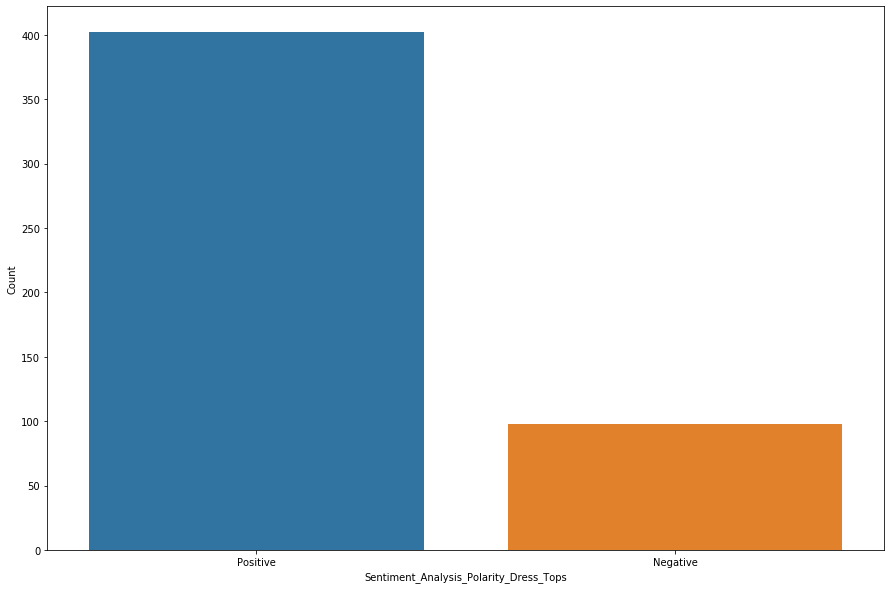

In [191]:

sns.countplot('Analysis_Pol', data=Dress_Tops)
_ = plt.xlabel('Sentiment_Analysis_Polarity_Dress_Tops')
_ = plt.ylabel('Count')
plt.show()

In [206]:
Dress_Tops

<500x2838 sparse matrix of type '<class 'numpy.float64'>'
	with 14495 stored elements in Compressed Sparse Row format>

In [194]:
def text_cleaning(Dress_Tops):
 remove_punctuation = [char for char in Dress_Tops if char not in string.punctuation]
 #print(remove_punctuation)
 remove_punctuation=''.join(remove_punctuation)
 #print(remove_punctuation)   
 return [word for word in remove_punctuation.split() if word.lower() not in stopwords.words('english')]

## Vocab
from sklearn.feature_extraction.text import CountVectorizer
bow_transformerDress_Tops = CountVectorizer(analyzer=text_cleaning).fit(Dress_Tops['Review_Text']) 

#bow_transformer_d = bow_transformer_d.sort_values(by=['values'], ascending=False)
  
#print(len(bow_transformer.vocabulary_))   
bow_transformerDress_Tops.vocabulary_


{'dont': 787,
 'normally': 1646,
 'review': 2022,
 'purchases': 1910,
 'amazed': 234,
 'poorly': 1828,
 'dress': 803,
 'made': 1472,
 'couldnt': 638,
 'help': 1168,
 'post': 1840,
 'neck': 1607,
 'line': 1417,
 'isnt': 1293,
 'even': 874,
 'hemmed': 1173,
 'flaps': 988,
 'material': 1497,
 'thin': 2494,
 'feel': 952,
 'cheap': 519,
 'worth': 2785,
 '20': 45,
 'opinion': 1686,
 'expecting': 902,
 'well': 2730,
 'good': 1110,
 'quality': 1922,
 'high': 1181,
 'price': 1868,
 'tag': 2440,
 'typically': 2595,
 'write': 2800,
 'bad': 318,
 'reviews': 2025,
 'want': 2696,
 'save': 2086,
 'someone': 2278,
 'else': 846,
 'buying': 473,
 'read': 1947,
 'mostly': 1574,
 'still': 2349,
 'purchased': 1909,
 'anyway': 252,
 'fault': 944,
 'know': 1345,
 'super': 2410,
 'stiff': 2348,
 'denim': 725,
 'way': 2713,
 'possible': 1838,
 'would': 2787,
 'soften': 2271,
 'washes': 2705,
 'im': 1242,
 '68': 106,
 'size': 2213,
 'small': 2247,
 'swallowed': 2421,
 'xs': 2804,
 'big': 370,
 'everywhere': 883

In [195]:
## Semtiment 
Trandf_DT= bow_transformerDress_Tops.transform(Dress_Tops['Review_Text'])
Df_DT = Trandf_N.toarray()
print(Df_DT)

Df_DT.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(1494, 5154)

In [222]:
# TF-IDF Algo -term frequency-inverse document frequency to know the most significant words
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer_DT=TfidfTransformer().fit(Trandf_DT)
print(tfidf_transformer_DT)

Dress_Tops=tfidf_transformer_DT.transform(Trandf_DT)
print(Dress_Tops)# got tfidf values for whole vocabulary
print(Dress_Tops.shape) 

TfidfTransformer()
  (0, 2785)	0.14683681717663905
  (0, 2730)	0.11427176665458458
  (0, 2494)	0.1315906947386359
  (0, 2440)	0.17871296893442812
  (0, 2022)	0.3292150941509274
  (0, 1922)	0.1135962454143329
  (0, 1910)	0.21283430294981426
  (0, 1868)	0.12186442644052708
  (0, 1840)	0.1950635730509896
  (0, 1828)	0.18335829250658967
  (0, 1686)	0.21283430294981426
  (0, 1646)	0.15459959099725284
  (0, 1607)	0.14862122116456356
  (0, 1497)	0.09263169146959922
  (0, 1472)	0.2138413858286207
  (0, 1417)	0.15684477325484994
  (0, 1293)	0.2936736343532781
  (0, 1181)	0.13273139531767467
  (0, 1173)	0.22693972480877864
  (0, 1168)	0.18872092501263898
  (0, 1110)	0.12186442644052708
  (0, 988)	0.22693972480877864
  (0, 952)	0.13513153663223915
  (0, 902)	0.1676345206779388
  (0, 874)	0.20264441391455618
  :	:
  (498, 277)	0.11244512249492093
  (498, 272)	0.291851813899289
  (498, 270)	0.12135485532871484
  (498, 243)	0.1321346087481146
  (498, 218)	0.15409778208625516
  (499, 2717)	0.14771369

In [224]:
words, values = pd.DataFrame(np.array(bow_transformer.get_feature_names())), pd.DataFrame(np.array(Dress_Tops.mean(axis=0))).transpose()

# Build a dataframe with the words and tf-idf results to view words with both the highest and lowest scores. 
review_Dress_Tops = pd.concat([words, values], axis=1)
review_Dress_Tops.columns = ['Words', 'tf-idf']
review_Dress_Tops = review_Dress_Tops.sort_values(by=['tf-idf'], ascending=True)


print('Top 20 Dress and Tops highest frequency: ') 
print(review_Dress_Tops.iloc[:20, :], '\n')


Top 20 Dress and Tops highest frequency: 
             Words    tf-idf
2015       isstill  0.000311
705          brick  0.000311
2529       nursing  0.000324
802       cardigan  0.000324
1278         drawn  0.000324
1404          ever  0.000324
1407     everygirl  0.000324
125         332537  0.000335
53           140lb  0.000335
2111          lack  0.000335
2149         leads  0.000335
1319        easily  0.000336
31            1214  0.000336
2155  leathervegan  0.000336
376         allows  0.000336
40              13  0.000336
1986       instead  0.000336
437       apparent  0.000336
1234     distracts  0.000336
2771       planned  0.000336 



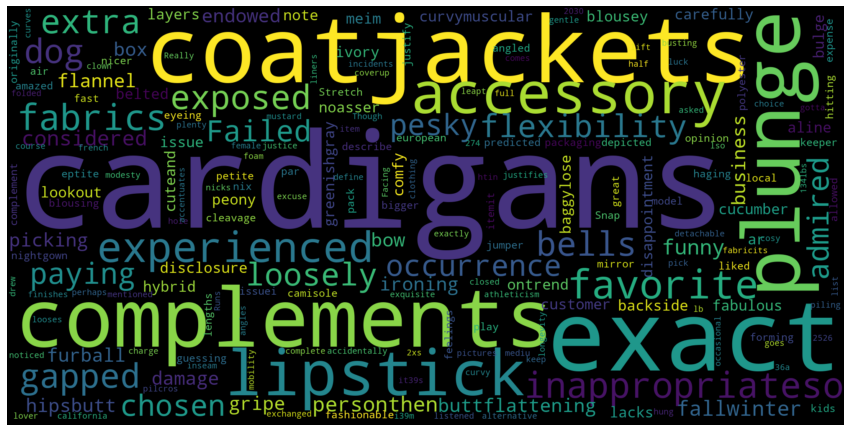

In [202]:
# Create a dictionary with the words and TF-IDF values that will be passed into WordCloud()
from wordcloud import WordCloud, ImageColorGenerator
d = {}
for a, x in review_Dress_Tops.values:
    d[a] = x

# Adjust image parameters to increase height and width of figure, create word cloud, and show image
plt.rcParams['figure.figsize'] = [15, 10]
wordcloud = WordCloud(scale=5)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [253]:

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Clooking for collinearity

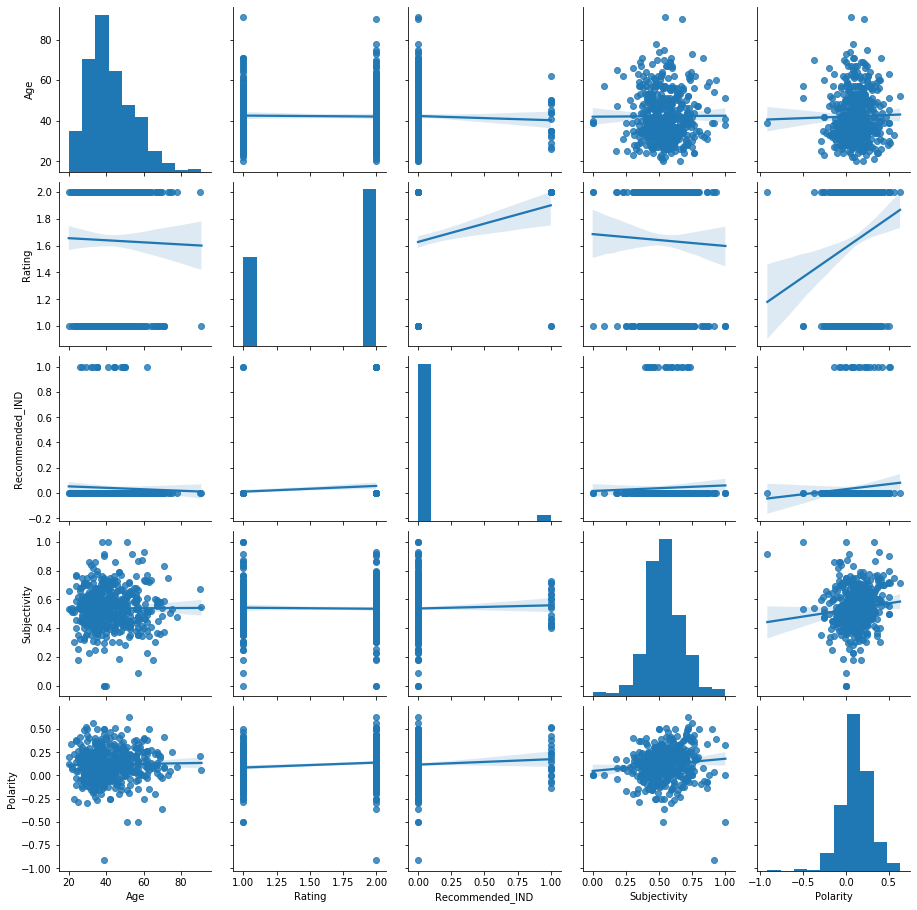

In [208]:
g = sns.pairplot(Dress_Tops, kind="reg")

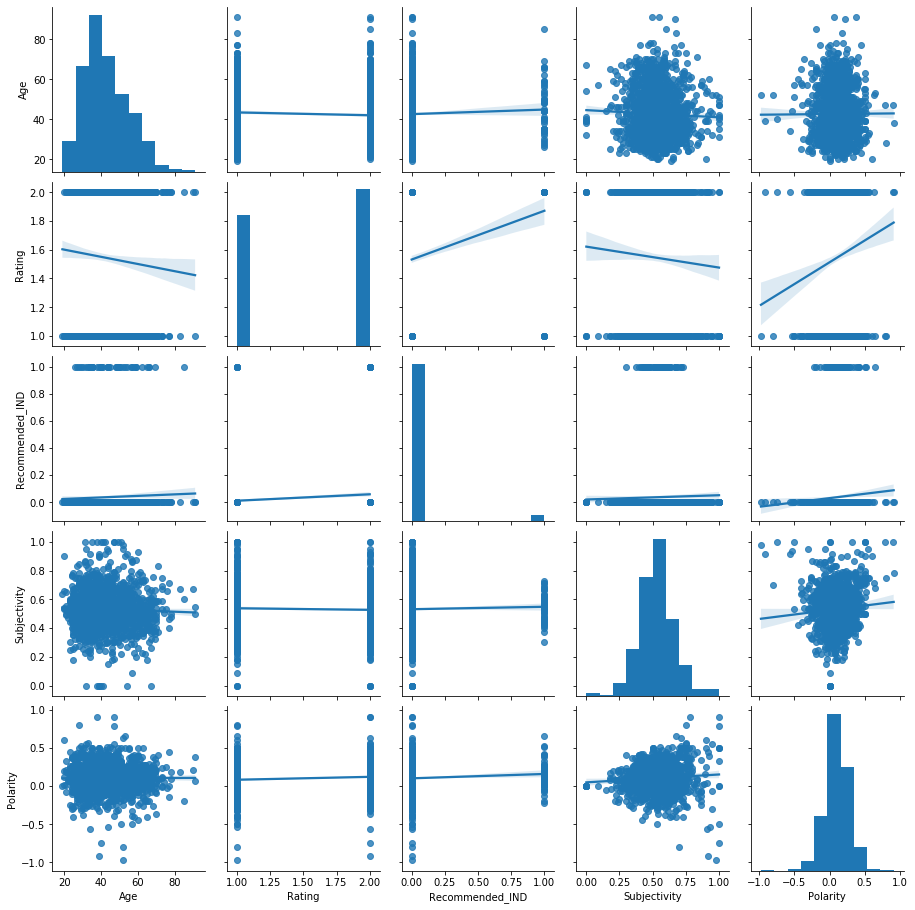

In [204]:
#Rating_1_2 = sns.pairplot(Rating_1_2, kind="reg")


g = sns.pairplot(Rating_1_2, kind="reg")

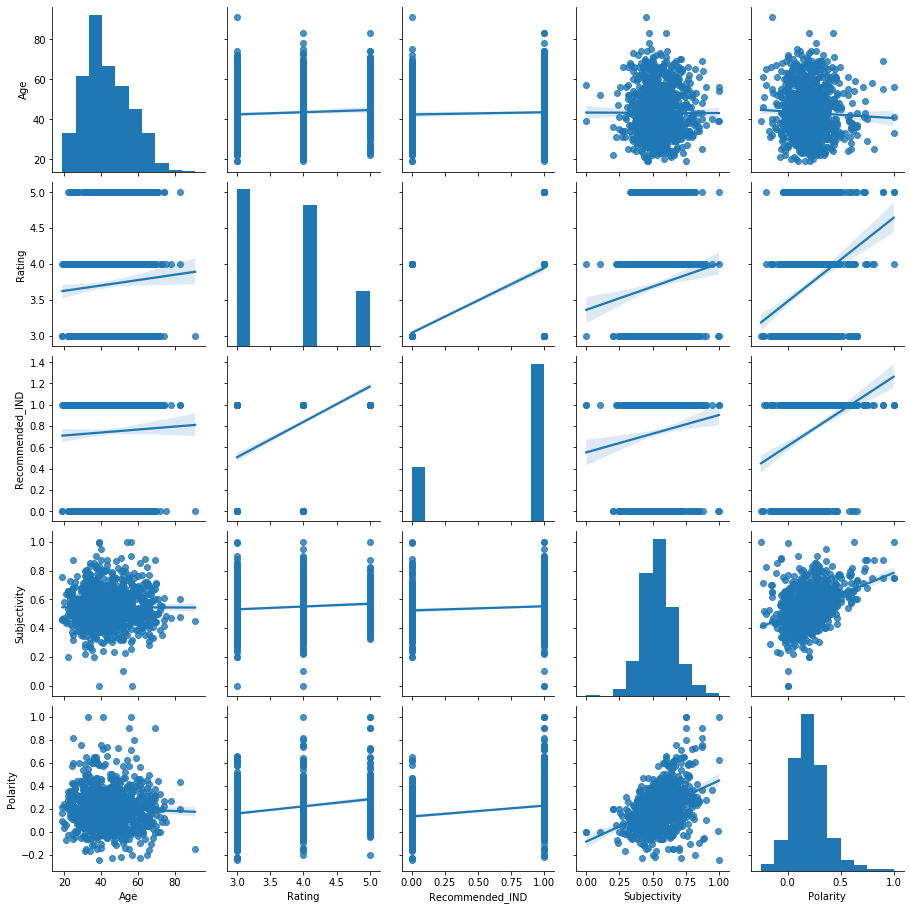

In [264]:
Rating_3_4_5= sns.pairplot(Rating_3_4_5, kind="reg")

# RATING ONE AND TWO VECTORATION AND TFIDF¶

In [103]:

def text_cleaning(Rating_1_2):
 remove_punctuation = [char for char in Rating_1_2 if char not in string.punctuation]
 #print(remove_punctuation)
 remove_punctuation=''.join(remove_punctuation)
 #print(remove_punctuation)   
 return [word for word in remove_punctuation.split() if word.lower() not in stopwords.words('english')]

## Vocab
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer_d = CountVectorizer(analyzer=text_cleaning).fit(Rating_1_2['Review_Text']) 

#bow_transformer_d = bow_transformer_d.sort_values(by=['values'], ascending=False)
  
#print(len(bow_transformer.vocabulary_))   
bow_transformer_d.vocabulary_

## Semtiment 
Trandf= bow_transformer.transform(Rating_1_2['Review_Text'])
Df_1_2 = Trandf.toarray()
print(Df_1_2)

Df_1_2.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(1494, 4305)

In [226]:
##Sentiment
# TF-IDF Algo -term frequency-inverse document frequency to know the most significant words
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer_d=TfidfTransformer().fit(Trandf_R1_2)
print(tfidf_transformer_d)

review_R1_2=tfidf_transformer_d.transform(Trandf_N)
print(review_R1_2)# got tfidf values for whole vocabulary
print(review_R1_2.shape)  

TfidfTransformer()
  (0, 5118)	0.26335054401675545
  (0, 4992)	0.19277051401864698
  (0, 4038)	0.17693803540966574
  (0, 3676)	0.15776568777959907
  (0, 3580)	0.22953147293222792
  (0, 3566)	0.19277051401864698
  (0, 3503)	0.42671319578002626
  (0, 3404)	0.16636940772313816
  (0, 2886)	0.2955399898637512
  (0, 2614)	0.17394089527916012
  (0, 2490)	0.28386905992765615
  (0, 2106)	0.23831978697315157
  (0, 1845)	0.10872307270055899
  (0, 1834)	0.2249599598656427
  (0, 1651)	0.35371774325362554
  (0, 1460)	0.23642403175863191
  (0, 735)	0.19814969185818324
  (1, 5043)	0.320653941051688
  (1, 4965)	0.26644013776050346
  (1, 4079)	0.16153377950123926
  (1, 4020)	0.14784196853972856
  (1, 3955)	0.20505333940276482
  (1, 3757)	0.28479094901280494
  (1, 3149)	0.3399080766551583
  (1, 2587)	0.12199197154754828
  :	:
  (1493, 3755)	0.21656915573905047
  (1493, 3705)	0.09945119315102989
  (1493, 3559)	0.07951247668881638
  (1493, 3470)	0.1853319448418633
  (1493, 3413)	0.2512404248538253
  (1493,

In [227]:
words, values = pd.DataFrame(np.array(bow_transformer_d.get_feature_names())), pd.DataFrame(np.array(review_R1_2.mean(axis=0))).transpose()

# Build a dataframe with the words and tf-idf results to view words with both the highest and lowest scores. 
review_R1_2 = pd.concat([words, values], axis=1)
review_R1_2.columns = ['Words', 'tf-idf']
review_R1_2 = review_R1_2.sort_values(by=['tf-idf'], ascending=False)


print('Rating_One-Two Top 20 highest frequency: ') 
print(review_R1_2.iloc[:20, :], '\n')

Rating_One-Two Top 20 highest frequency: 
         Words    tf-idf
1543     dress  0.044610
2587      like  0.033047
4627       top  0.027797
1740    fabric  0.026703
1845       fit  0.026637
4020      size  0.025992
5070     would  0.024898
587       back  0.022935
2632      look  0.021880
4079     small  0.021715
3077   ordered  0.020210
2746  material  0.020069
3559    really  0.019662
3942     shirt  0.018416
4938       way  0.018376
2635     looks  0.018237
2661      love  0.018193
4943      wear  0.017988
2633    looked  0.017741
1103     color  0.017374 



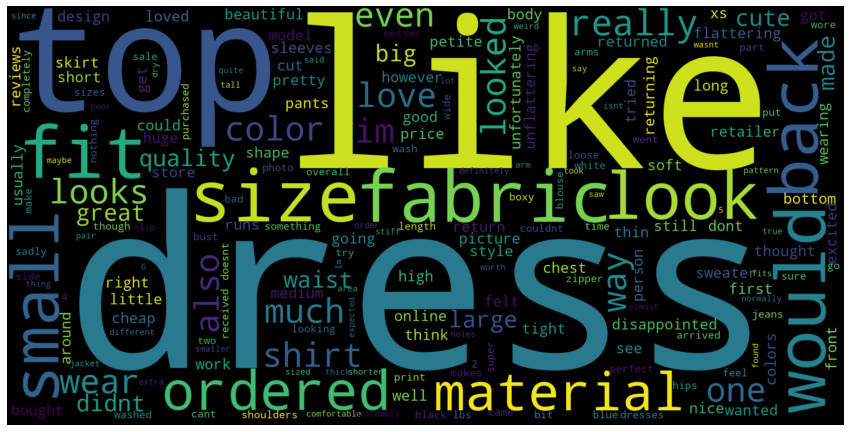

In [86]:
# Create a dictionary with the words and TF-IDF values that will be passed into WordCloud()
from wordcloud import WordCloud, ImageColorGenerator
d = {}
for a, x in review_R1_2.values:
    d[a] = x

# Adjust image parameters to increase height and width of figure, create word cloud, and show image
plt.rcParams['figure.figsize'] = [15, 10]
wordcloud = WordCloud(scale=5)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# RATING THREE TO FIVE VECTORATION, TFIDF¶ and WORD CLOUD

In [104]:
def text_cleaning(Rating_3_4_5):
 remove_punctuation = [char for char in Rating_3_4_5 if char not in string.punctuation]
 #print(remove_punctuation)
 remove_punctuation=''.join(remove_punctuation)
 #print(remove_punctuation)   
 return [word for word in remove_punctuation.split() if word.lower() not in stopwords.words('english')]

## Vocab
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_cleaning).fit(Rating_3_4_5['Review_Text']) 
  
#print(len(bow_transformer.vocabulary_))   
bow_transformer.vocabulary_


## Semtiment 
Trandf_R3_5= bow_transformer_d.transform(Rating_1_2['Review_Text'])
Trandf_R3_5 = Trandf_N.toarray()
print(Trandf_R3_5)

Trandf_R3_5.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(1494, 5154)

In [228]:
##Sentiment
# TF-IDF Algo -term frequency-inverse document frequency to know the most significant words
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(Df_3_5)
print(tfidf_transformer)

review_R3_5=tfidf_transformer.transform(Df_3_5)
print(review_R3_5)# got tfidf values for whole vocabulary
print(review_R3_5.shape)  




TfidfTransformer()
  (0, 4075)	0.10664688271639396
  (0, 3784)	0.11238065464466022
  (0, 3697)	0.17304941376698438
  (0, 3350)	0.07230422595899505
  (0, 3077)	0.1247717890369195
  (0, 2784)	0.2008419593580306
  (0, 2574)	0.3915712062986546
  (0, 2492)	0.09637038350209653
  (0, 2334)	0.141171038021258
  (0, 2299)	0.13332397224788806
  (0, 2236)	0.17466459891047192
  (0, 2202)	0.16668082706872436
  (0, 2168)	0.11350538383669914
  (0, 2162)	0.31073916118668954
  (0, 2153)	0.1527440687087391
  (0, 2121)	0.09823195464054499
  (0, 1945)	0.16866939879130985
  (0, 1867)	0.16668082706872436
  (0, 1832)	0.15974959556901927
  (0, 1825)	0.19140558817365277
  (0, 1735)	0.10695779867147746
  (0, 1654)	0.12757703500229853
  (0, 1603)	0.22357814874037352
  (0, 1576)	0.10790863010607336
  (0, 935)	0.08501204242039204
  :	:
  (1005, 3153)	0.1412513875467671
  (1005, 3045)	0.11716154734132105
  (1005, 2703)	0.2232517873134987
  (1005, 2588)	0.18807875826414153
  (1005, 2564)	0.13687989239172366
  (1005, 

In [229]:
words, values = pd.DataFrame(np.array(bow_transformer.get_feature_names())), pd.DataFrame(np.array(review_R3_5.mean(axis=0))).transpose()

# Build a dataframe with the words and tf-idf results to view words with both the highest and lowest scores. 
review_R3_5 = pd.concat([words, values], axis=1)
review_R3_5.columns = ['Words', 'tf-idf']
review_R3_5 = review_R3_5.sort_values(by=['tf-idf'], ascending=False)


print('Top 20  Rating three - five highest frequency: ') 
print(review_R3_5.iloc[:20, :], '\n')




Top 20  Rating three - five highest frequency: 
        Words    tf-idf
3350     size  0.032336
2037   jacket  0.027804
1549      fit  0.027469
3402    small  0.027407
2190     like  0.027041
2265     love  0.026712
4126     wear  0.025841
1753    great  0.024399
1941       im  0.023696
4242    would  0.022761
935     color  0.022089
2968   really  0.021714
2236     look  0.021653
1451   fabric  0.020636
2219   little  0.018918
3431     soft  0.018671
2588  ordered  0.018508
3860      top  0.018389
2121    large  0.018159
2492     nice  0.018047 



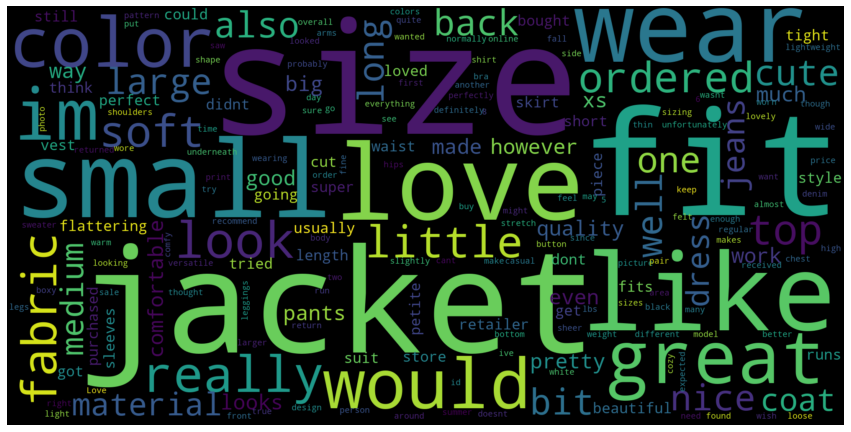

In [388]:
#Rating 3-5

# Create a dictionary with the words and TF-IDF values that will be passed into WordCloud()
from wordcloud import WordCloud, ImageColorGenerator
d = {}
for a, x in review_tfidfN.values:
    d[a] = x

# Adjust image parameters to increase height and width of figure, create word cloud, and show image
plt.rcParams['figure.figsize'] = [15, 10]
wordcloud = WordCloud(scale=5)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# RATING ONE AND TWO MODEL

In [48]:
#Splitting the data

from sklearn.model_selection import train_test_split
import numpy as np
# Convert label back to int.
#df2['Analysis'] = df['Analysis'].astype('int')
# Split the data into train and test sets.
np.random.seed(220)
x_train, x_test, y_train, y_test = train_test_split(Rating_1_2['Review_Text'], Rating_1_2['Analysis_Pol'], test_size=0.33, random_state=50)

from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(min_df=2, max_df=0.8, sublinear_tf=True, use_idf=True, stop_words='english')


# Count and transform the training and testing sets.
x_train_ld = tf.fit_transform(x_train)
x_test_ld = tf.transform(x_test)

In [57]:
##sentiment
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#Printing the confusion matrix of our prediction
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [41]:

# Now to use an svm to create the model. 
#model1= LinearSVC()
model1=LinearSVC()
model1.fit(x_train_ld, y_train)

result1 = model1.predict(x_test_ld)
#print(result1)

print('SVM Accuracy: %s ' % (accuracy_score(y_test, result1)))

# print the confusion matrix
metrics.confusion_matrix(y_test, result1)

SVM Accuracy: 0.8090909090909091 


array([[ 19,  55],
       [  8, 248]], dtype=int64)

In [42]:
from sklearn.naive_bayes import MultinomialNB

Mul_model2 = MultinomialNB()
Mul_model2.fit(x_train_ld, y_train)

result2 = Mul_model2.predict(x_test_ld)
#print(result2)

print('MNB Accuracy: %s ' % (accuracy_score(y_test, result2)))

# print the confusion matrix
metrics.confusion_matrix(y_test, result2)

MNB Accuracy: 0.7757575757575758 


array([[  0,  74],
       [  0, 256]], dtype=int64)

In [43]:
##sentiment
from sklearn.naive_bayes import BernoulliNB
Bern_clf_ld = BernoulliNB()
Bern_clf_ld.fit(x_train_ld, y_train)

Bern_result_ld = Bern_clf_ld.predict(x_test_ld)
#print(Bern_result_ld)

print('Bern: %s ' % (accuracy_score(y_test, Bern_result_ld)))

metrics.confusion_matrix(y_test, Bern_result_ld)

Bern: 0.7727272727272727 


array([[ 10,  64],
       [ 11, 245]], dtype=int64)

In [51]:


# Now to use an svm to create the model. 
model1=LinearSVC(verbose=1)
model1.fit(x_train_ld, y_train)

result1 = model1.predict(x_test_ld)
#print(result1)

print('SVM Accuracy: %s ' % (accuracy_score(y_test, result1)))

# print the confusion matrix
metrics.confusion_matrix(y_test, result1)

[LibLinear]SVM Accuracy: 0.7894736842105263 


array([[ 44,  71],
       [ 33, 346]], dtype=int64)

In [321]:
len_score= cross_val_score(model1,x_train_snt, y_train, cv=5)
len_score.mean()

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

0.799

In [322]:
MNB_score= cross_val_score(Mul_model2,x_train_snt, y_train, cv=5)
MNB_score.mean()

0.762

In [323]:
Bern_score= cross_val_score(Bern_clf,x_train_snt, y_train, cv=5)
Bern_score.mean()

0.76

# DRESSES AND TOPS MODEL

In [105]:
#Splitting the data

from sklearn.model_selection import train_test_split
import numpy as np
# Convert label back to int.
#df2['Analysis'] = df['Analysis'].astype('int')
# Split the data into train and test sets.
np.random.seed(220)
x_train, x_test, y_train, y_test = train_test_split(Dress_Tops['Review_Text'], Dress_Tops['Analysis_Pol'], test_size=0.33, random_state=50)

from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(min_df=2, max_df=0.8, sublinear_tf=True, use_idf=True, stop_words='english')


# Count and transform the training and testing sets.
x_train_ld = tf.fit_transform(x_train)
x_test_ld = tf.transform(x_test)

In [106]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
#Printing the confusion matrix of our prediction
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [107]:



# Now to use an svm to create the model. 
#model1= LinearSVC()
modelDT=LinearSVC()
modelDT.fit(x_train_ld, y_train)

resultDT = modelDT.predict(x_test_ld)
#print(resultDT)

print('SVM Accuracy: %s ' % (accuracy_score(y_test, resultDT)))

# print the confusion matrix
metrics.confusion_matrix(y_test, resultDT)

SVM Accuracy: 0.8090909090909091 


array([[ 19,  55],
       [  8, 248]], dtype=int64)

In [108]:

from sklearn.naive_bayes import MultinomialNB

Mul_modelNB = MultinomialNB()
Mul_modelNB.fit(x_train_ld, y_train)

resultNB = Mul_modelNB.predict(x_test_ld)
#print(resultNB)

print('MNB Accuracy: %s ' % (accuracy_score(y_test, resultNB)))

# print the confusion matrix
metrics.confusion_matrix(y_test, resultNB)

MNB Accuracy: 0.7757575757575758 


array([[  0,  74],
       [  0, 256]], dtype=int64)

In [109]:
##sentiment
from sklearn.naive_bayes import BernoulliNB
Bern_clf_brn = BernoulliNB()
Bern_clf_brn.fit(x_train_ld, y_train)

Bern_result_brn = Bern_clf_brn.predict(x_test_ld)
#print(Bern_result_brn)

print('Bern: %s ' % (accuracy_score(y_test, Bern_result_brn)))

metrics.confusion_matrix(y_test, Bern_result_brn)

Bern: 0.7727272727272727 


array([[ 10,  64],
       [ 11, 245]], dtype=int64)

# DRESSES AND TOPS VALIDATION SCORE

In [110]:

len_score= cross_val_score(modelDT,x_train_ld, y_train, cv=5)
len_score.mean()


0.7895522388059703

In [111]:

MNB_score= cross_val_score(Mul_modelNB,x_train_ld, y_train, cv=5)
MNB_score.mean()

0.7805970149253731

In [112]:


Bern_score= cross_val_score(Bern_clf_brn,x_train_ld, y_train, cv=5)
Bern_score.mean()

0.755223880597015

In [212]:
Alldata

,ID,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,22364,1072,18,I get so many compliments,I found this dress on sale in store and i usua...,4,1,0,General,Dresses,Dresses
1,22390,868,18,"A little big, but so comfortable!",This shirt is incredibly comfortable. the mate...,4,1,0,General,Tops,Knits
2,8858,1094,18,Love,I bought this dress for my engagement photo sh...,5,1,0,General,Dresses,Dresses
3,19704,1008,18,Stunning,This skirt is absolutely beautiful and is a go...,5,1,1,General,Bottoms,Skirts
4,8627,774,19,Online way different from in person,This dress is very thick cotton material. like...,1,0,2,Initmates,Intimate,Lounge
...,...,...,...,...,...,...,...,...,...,...,...
3994,6819,1092,33,Not quite for me,Based on other reviews i had no doubt this dre...,4,1,0,General,Dresses,Dresses
3995,6920,867,33,Good basic,"I bought the blue & black, they are great basi...",4,1,0,General Petite,Tops,Knits
3996,6922,1084,33,Better than expected!,I purchased this dress before reading any of t...,4,1,1,General Petite,Dresses,Dresses
3997,6924,871,33,Runs small,Definitely size up...possibly two sizes. i can...,4,1,0,General,Tops,Knits


In [ ]:
# Isolate the tweets in a corpus list
corpus = Rating_1_2['Review_Text']

cv = CountVectorizer(token_pattern=r'\b[^\d\W]+\b')
Xcv = cv.fit_transform(corpus)

# Create a TF-IDF vectorizer to compare results. 
tfidf = TfidfVectorizer(token_pattern=r'\b[^\d\W]+\b')
Xti = tfidf.fit_transform(corpus)

# Print length of the dictionaries to serve as a baseline. 
print("Count Vectorizer Rating_1_2 words in dictionary: %s" % len(cv.get_feature_names()))
print('TF-IDF Vectorizer Rating_1_2 words in dictionary: %s' % len(tfidf.get_feature_names()))

In [ ]:
##CNN and FOX news
num_topics=10
lda_model_CNN = LDA(n_components=num_topics, max_iter=100, learning_method='online')


# In[210]:


LDA_CNN_Model = lda_model_CNN.fit_transform(count_data)
count_data = count_vectorizer.fit_transform(df_cnn['text'])
words = count_vectorizer.get_feature_names()

word_topic = np.array(lda_model_CNN.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 10
num_topics = 10
vocab_array = np.asarray(words)

# RESULTS SUMMARY


Fashion is customary to its origin but also loved in different parts of the world. Who does not love style when clothing is worn every day? Statistics from Inc website states, "91% of people read online reviews regularly or occasionally." "84% of people trust online reviews as much as friends." "68% of people form an opinion after reading one to six online reviews." Businesses could turn reviews into revenues. Therefore, how would customers wade through all these products and services to understand which platforms, products, and services are good or bad choices based on reviews from Kaggle's E-commerce Women's Clothing? 

After comparing ratings one and two to ratings three through five, the data showed the majority demographics did not change and was still the same age group from ages 25 – 55. 

The departments to consider for improvements based on reviews are Dresses and Tops, on tops specifically to knits. These two departments have approximately 1,000 counts of individuals not in ratings three through five.  

After performing sentiment analysis to the target products/focus products, specifically polarity analysis, the data shows promising results, about 400 reviews that show positive and about 100 negative results. These have a higher probability of turning this product rating 3-5. By improving the product from fabric quality, show true color, not photoshop/photo enhancer.  By utilizing tools like a camera to reflect true color in the pictures and easy access to the size charts. 

This project is one of the classification problems. Out of three models Naïve Bayes(BNB), Bernoulli, and Support Vector Machine(SVM). SVM linear shows is a good algorithm to use, although it is not perfect. 
I suggest training all three models with large datasets to see the best results.


# LESSON LEARN

Lesson learn When I was experimenting and analyzing the word cloud, something missing. This time I made a different approach. All processes are the same; besides the following, I did not use a stemmer  I CountVectorizer and TFIDF, then shape the data, then pass through to the WorldClound this time works the way I expected. As data scientist essential to have an open mind to try different methodology to test against each other to see if the results are comparable.


# CONCLUSIONS

This analysis has shown two-fold: first, no single approach to a problem will be a panacea. If time permits, trying as many strategies and permutations of those strategies as you can is the best way to achieve good results. Assuming one strategy will perform poorly and not testing it out could lead to lost opportunities to produce better results. Second, looking at accuracy as a measurement is not good enough. Data scientists must use alternate, more nuanced analysis to gain better insights into what their methods achieve.

 From a customers' perspective, reviews can help people make more informed decisions, and understanding how machine learning works, even at a basic level, may help customers write better reviews. How? It isn't easy to be heard when there are so many voices online. Suppose word choice is essential data aggregation and understanding sentiment more quickly, perhaps by modifying one's reviews to be more easily understood by machines. In that case, executives will become more informed about customers' opinions. This could lead to better products and services since, ultimately, businesses want to sell more, and happy customers are more likely to be returning customers.

From a business standpoint, as technology continues its march forward, human society will move along with it and attempt to utilize it in a myriad of ways to better our lives and make business easier. Data analytics techniques are rapidly being developed and deployed around the internet, from condensing information to identifying bath-faith actors. Even in phones and smartwatches, people carry around every day. With any luck, mathematicians and data scientists will keep up with the internet and data to better understand our fellow citizens and truly know if that clothing store is worthy of its five-star Rating.
